# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [11]:
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split
import numpy as np
import cifar10



cifar10.maybe_download_and_extract()


# TODO: Fill this in based on where you saved the training and testing data

training_file = '../train.p'
testing_file = '../test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    

X_train_raw, y_train_raw,tmp_y_train = cifar10.load_training_data()
X_test_raw, y_test, tmp_y_test = cifar10.load_test_data()

print(y_train_raw[0])
#X_train_raw, y_train_raw = train['features'], train['labels']
#X_test_raw, y_test = test['features'], test['labels']

print("Training size x {}".format(len(X_train_raw)))
print("Training size y {}".format(len(y_train_raw)))
print("Test size x {}".format(len(X_test_raw)))
print("Test size y {}".format(len(y_test)))

print("Image shape {}".format(X_train_raw[0].shape))

print("Classes {}".format(len(np.unique(cls_test))))


Data has apparently already been downloaded and unpacked.
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch
6
Training size x 50000
Training size y 50000
Test size x 10000
Test size y 10000
Image shape (32, 32, 3)
Classes 10


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [12]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train_raw.shape[0]

# TODO: Number of testing examples.
n_test = X_test_raw.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_raw[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



Number of training examples = 50000
Number of testing examples = 10000
Image data shape = (32, 32, 3)
Number of classes = 10


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

3


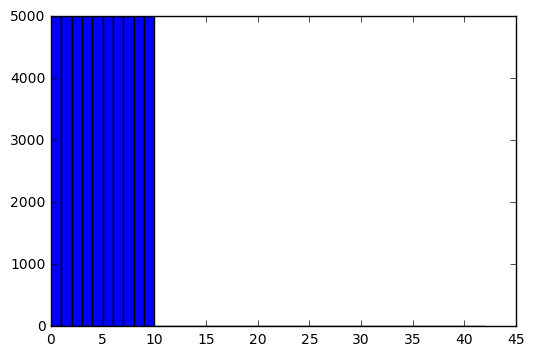

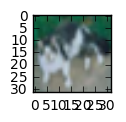

In [18]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train_raw))
image = X_train_raw[index]
plt.hist(y_train_raw, bins=range(43))

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train_raw[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

1


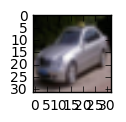

In [25]:
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer
%matplotlib inline
### Preprocess the data here.

X_train_tmp = X_train_raw.reshape(X_train_raw.shape[0],-1)
X_test_tmp = X_test_raw.reshape(X_test_raw.shape[0],-1)

minmax_scale = preprocessing.MinMaxScaler().fit(X_train_tmp)
X_train_norm = minmax_scale.transform(X_train_tmp).reshape(X_train_raw.shape)
X_test = minmax_scale.transform(X_test_tmp).reshape(X_test_raw.shape)

index = random.randint(0, len(X_train_norm))
image = X_train_norm[index]

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train_raw[index])

#X_train, y_train = shuffle(X_train_norm, y_train_raw)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

In [ ]:
"""
I used scikit-learn's MinMax normalization, this reduces the input to within [0,1] and gives the data equal variance.
This standardization helps prevent the optimizer from getting stuck in local minima while training, as all the 
features are normalized to similar range so all the weights should train at same speed.
"""

**Answer:**



In [26]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

X_train, X_validation, y_train, y_validation= train_test_split(X_train_norm, y_train_raw,test_size=0.2,random_state=15)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

In [ ]:
"""
I created a validation set using the train_test_split function from scikit-learn. I use 20% of the training set
as the validation set. I experimented with generating data using random rotations and scales, but ended up having
issues with image format so did not include it in my submission.
"""

**Answer:**

In [34]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf

mu = 0
sigma = 0.1

weights= [tf.Variable(tf.truncated_normal([3, 3, 3, 32],mean = mu, stddev = sigma)),
tf.Variable(tf.truncated_normal([3, 3, 32, 32],mean = mu, stddev = sigma)),
tf.Variable(tf.truncated_normal([3, 3, 32, 96],mean = mu, stddev = sigma)),
tf.Variable(tf.truncated_normal([3, 3, 96, 96],mean = mu, stddev = sigma)),
tf.Variable(tf.truncated_normal([2400, 400],mean = mu, stddev = sigma)),
tf.Variable(tf.truncated_normal([400, 84],mean = mu, stddev = sigma)),
tf.Variable(tf.truncated_normal([84, 10],mean = mu, stddev = sigma))]

bias =[tf.Variable(tf.zeros(32)),
tf.Variable(tf.zeros(32)),
tf.Variable(tf.zeros(96)),
tf.Variable(tf.zeros(96)),
tf.Variable(tf.zeros(400)),
tf.Variable(tf.zeros(84)),
tf.Variable(tf.zeros(10))]

def conv2d(x, W, b, strides=1): 
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID') 
    x = tf.nn.bias_add(x, b) 
    return tf.nn.relu(x)

def LeNet(x, weights, bias):    
    x = tf.nn.dropout(x, keep_prob2)
    
    conv_net = conv2d(x,weights[0],bias[0],1)
    
    #downsample
    conv_net = conv2d(conv_net,weights[1],bias[1],2)    
    conv_net = tf.nn.dropout(conv_net, keep_prob)
    
    conv_net = conv2d(conv_net,weights[2],bias[2],1)
    
    #downsample
    conv_net = conv2d(conv_net,weights[3],bias[3],2)
    conv_net = tf.nn.dropout(conv_net, keep_prob)
    
    #fully connected layer
    fc1 = tf.reshape( conv_net,[-1, 2400]) 
    fc1 = tf.add(tf.matmul(fc1, weights[4]), bias[4]) 
    fc1 = tf.nn.relu(fc1) 
    fc1 = tf.nn.dropout(fc1, keep_prob)

    #fully connected layer
    fc2 = tf.add(tf.matmul(fc1, weights[5]), bias[5]) 
    fc2 = tf.nn.relu(fc2) 
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    logits = tf.add(tf.matmul(fc2, weights[6]), bias[6])
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
"""
My architecture is based off the LeNet lab, but I used convolutions for downsampling instead of max pooling
layers. In addtion I used all 3X3 convolutions. These changes were inspired by [1] as I discuss in question 5. For
regularization I used dropout and L2. For the depth of the convolutions I start out with 32 and increased it to 96
in the next layer, I found these changes greatly improved the networks accuracy on the validation set. 

INPUT -> [CONV -> RELU -> POOL(Conv with stride of 2) -> Dropout]*2 -> FC -> RELU -> Dropout -> FC -> Dropout

[1] Jost Tobias Springenberg, Alexey Dosovitskiy, Thomas Brox, Martin A. Riedmiller:
Striving for Simplicity: The All Convolutional Net. CoRR abs/1412.6806 (2014)
"""

In [35]:
EPOCHS = 30
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
rate = tf.placeholder(tf.float32)

keep_prob = tf.placeholder(tf.float32)
keep_prob2 = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 10)

In [36]:
logits = LeNet(x, weights, bias)
beta = 0.0005

#cross entropy with L2 regularization
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y) + \
                    beta*tf.nn.l2_loss(weights[0]) + \
                    beta*tf.nn.l2_loss(weights[1]) + \
                    beta*tf.nn.l2_loss(weights[2]) + \
                    beta*tf.nn.l2_loss(weights[3]) + \
                    beta*tf.nn.l2_loss(weights[4]) + \
                    beta*tf.nn.l2_loss(weights[5]) + \
                    beta*tf.nn.l2_loss(weights[6])


loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0, keep_prob2: 1.0, rate: 0.001})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [37]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
     
    #{x: batch_x, y: batch_y,keep_prob: 0.5}
    print("Training...")
    print()
    for i in range(EPOCHS):
        l_rate = 0.001
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5, keep_prob2: 1.0, rate: l_rate})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'traffic-signs')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.264

EPOCH 2 ...
Validation Accuracy = 0.436

EPOCH 3 ...
Validation Accuracy = 0.458

EPOCH 4 ...
Validation Accuracy = 0.501

EPOCH 5 ...
Validation Accuracy = 0.555

EPOCH 6 ...
Validation Accuracy = 0.560

EPOCH 7 ...
Validation Accuracy = 0.599

EPOCH 8 ...
Validation Accuracy = 0.606

EPOCH 9 ...
Validation Accuracy = 0.628

EPOCH 10 ...
Validation Accuracy = 0.623

EPOCH 11 ...
Validation Accuracy = 0.660

EPOCH 12 ...
Validation Accuracy = 0.648

EPOCH 13 ...
Validation Accuracy = 0.664

EPOCH 14 ...
Validation Accuracy = 0.690

EPOCH 15 ...
Validation Accuracy = 0.675

EPOCH 16 ...
Validation Accuracy = 0.673

EPOCH 17 ...
Validation Accuracy = 0.693

EPOCH 18 ...
Validation Accuracy = 0.697

EPOCH 19 ...
Validation Accuracy = 0.697

EPOCH 20 ...
Validation Accuracy = 0.713

EPOCH 21 ...
Validation Accuracy = 0.713

EPOCH 22 ...
Validation Accuracy = 0.714

EPOCH 23 ...
Validation Accuracy = 0.724

EPOCH 24 ...
Validation Accura

In [38]:
#Evaluate Model on test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.742


             precision    recall  f1-score   support

          0       0.76      0.77      0.77      1000
          1       0.86      0.88      0.87      1000
          2       0.71      0.51      0.59      1000
          3       0.57      0.51      0.54      1000
          4       0.70      0.68      0.69      1000
          5       0.65      0.68      0.66      1000
          6       0.71      0.86      0.78      1000
          7       0.84      0.78      0.81      1000
          8       0.82      0.86      0.84      1000
          9       0.77      0.89      0.83      1000

avg / total       0.74      0.74      0.74     10000



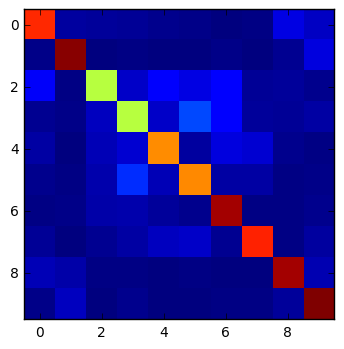

In [39]:
#look at confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    total_predictions = None
    num_examples = len(X_test)
    sess = tf.get_default_session()
    #do it in batches so we don't run out of memory 
    for offset in range(0, num_examples, 6000):
        batch_x, batch_y = X_test[offset:offset+6000], y_test[offset:offset+6000]
        predictions = sess.run(tf.argmax(logits, 1),feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0, keep_prob2: 1.0, rate: 0.001})
        #print(predictions.shape)
        if(total_predictions is None):
            total_predictions = predictions
        else:
            total_predictions = np.hstack([total_predictions,predictions])
            
    mat = confusion_matrix(y_test,total_predictions)
    plt.imshow(mat, interpolation='nearest')
    report = classification_report(y_test,total_predictions)
    print(report)

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.